
# Medidas de tendencia central y dispersión (Python)

Este cuaderno está diseñado para practicar, paso a paso, los conceptos:

**Tendencia central**: media, mediana, moda, rango medio.  
**Dispersión**: rango, cuartiles, rango intercuartílico (IQR), varianza (poblacional y muestral), desviación estándar.

Dataset: `dataset_estadistica_basica.csv` (sintético con valores perdidos, outliers y 2 duplicados).

> Sugerencia docente: puedes duplicar el cuaderno y ocultar las celdas de verificación si quieres que el alumnado entregue sus propios resultados.


In [2]:

# Importaciones básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 3)


## 1. Cargar datos

In [3]:

# Intenta cargar el CSV desde la carpeta actual
from pathlib import Path

posibles = [Path("dataset_estadistica_basica.csv")]
ruta = None
for p in posibles:
    if p.exists():
        ruta = p
        break

assert ruta is not None, "No se encontró el CSV. Coloca 'dataset_estadistica_basica.csv' junto al cuaderno."
df = pd.read_csv(ruta, parse_dates=["fecha_alta"])
df.head()


,id,sexo,estudios,edad,altura_cm,peso_kg,imc,horas_estudio_semana,tazas_cafe_dia,sueno_horas,...,trabajo_parcial,fumador,pasos_dia,pantalla_horas,satisfaccion,fecha_alta,examenes_realizados,ausencias,cohorte,dispositivo
0,1,Mujer,ASIR,34.0,168.1,80.8,28.6,12.5,2,9.6,...,True,False,6376.0,2.2,4.0,2025-04-11,10,3,2024,Móvil
1,2,Hombre,Ciberseguridad,26.0,172.8,76.5,25.6,14.0,2,7.3,...,False,True,9868.0,4.8,1.0,2025-02-15,10,2,2024,Portátil
2,3,Mujer,DAW,28.0,171.6,79.6,27.0,7.2,1,7.6,...,False,False,11002.0,5.6,NaN,2024-02-03,4,4,2024,Móvil
3,4,Mujer,DAM,25.0,177.8,55.1,17.4,12.2,0,5.7,...,True,False,7620.0,8.7,1.0,2024-02-20,3,3,2023,Portátil
4,5,Hombre,DAM,24.0,178.1,76.0,24.0,15.4,2,5.5,...,False,False,5559.0,5.2,1.0,2025-02-06,4,1,2025,Portátil



### Contexto del dataset
- Filas duplicadas intencionadas (2).
- ~3% de valores perdidos en algunas columnas.
- Outliers en `edad` (>80) y `nota` (<0 o >10).

**Tarea 1.1**: Inspecciona el dataset: tipos, valores perdidos y duplicados.


In [4]:

# 👉 COMPLETA: inspección inicial
# 1) Información general
info_df = df.info()

# 2) % de NA por columna (pista: df.isna().mean())
na_pct = df.isna().mean().sort_values(ascending=False)

# 3) Número de duplicados (pista: df.duplicated().sum())
n_dups = df.duplicated().sum()

na_pct, n_dups


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    20 non-null     int64         
 1   sexo                  20 non-null     object        
 2   estudios              20 non-null     object        
 3   edad                  19 non-null     float64       
 4   altura_cm             18 non-null     float64       
 5   peso_kg               18 non-null     float64       
 6   imc                   20 non-null     float64       
 7   horas_estudio_semana  20 non-null     float64       
 8   tazas_cafe_dia        20 non-null     int64         
 9   sueno_horas           20 non-null     float64       
 10  nota                  20 non-null     float64       
 11  aprobado              20 non-null     bool          
 12  ciudad                20 non-null     object        
 13  ingresos_familiares   

(peso_kg                 0.10
 altura_cm               0.10
 pantalla_horas          0.10
 satisfaccion            0.10
 edad                    0.05
 sexo                    0.00
 estudios                0.00
 id                      0.00
 horas_estudio_semana    0.00
 imc                     0.00
 tazas_cafe_dia          0.00
 sueno_horas             0.00
 ciudad                  0.00
 ingresos_familiares     0.00
 nota                    0.00
 aprobado                0.00
 fumador                 0.00
 trabajo_parcial         0.00
 pasos_dia               0.00
 fecha_alta              0.00
 examenes_realizados     0.00
 ausencias               0.00
 cohorte                 0.00
 dispositivo             0.00
 dtype: float64,
 np.int64(0))


### Limpieza opcional
Para algunos ejercicios compararemos resultados **antes y después** de limpiar outliers y duplicados.

**Tarea 1.2**: Crea `df_clean` eliminando duplicados y marcando como NA los outliers:
- `nota` fuera de \[0,10]
- `edad` > 80


In [5]:

# 👉 COMPLETA: crea df_clean a partir de df
df_clean = df.copy()

# Elimina duplicados
df_clean = df_clean.drop_duplicates()

# Marca como NA outliers en nota y edad
df_clean.loc[(df_clean["nota"] < 0) | (df_clean["nota"] > 10), "nota"] = pd.NA
df_clean.loc[df_clean["edad"] > 80, "edad"] = pd.NA

df_clean[["edad","nota"]].describe(include="all")


,edad,nota
count,19.000,18.000
mean,25.526,6.761
std,5.157,1.713
min,18.000,2.550
25%,21.500,6.070
50%,26.000,6.565
75%,28.500,7.947
max,34.000,9.770



## 2. Medidas de tendencia central

Trabajaremos con la variable `nota` (y compararemos con `df_clean`).

**Tarea 2.1**: Calcula para `nota` en `df`:
- Media (`media_nota`)
- Mediana (`mediana_nota`)
- Moda (`moda_nota`)  \*si hay varias, quédate con la menor
- Rango medio (`rango_medio_nota`) = (máximo + mínimo) / 2

Repite lo mismo para `df_clean` y compáralo.


In [6]:

# 👉 COMPLETA: tendencia central en df
print("media de nota", df["nota"].mean())
print("mediana de nota", df["nota"].median())
print("moda de edad", df["edad"].mode())
print("rango medio de edad", (df["edad"].max() + df["edad"].min()) / 2)


media de nota 7.2090000000000005
mediana de nota 6.79
moda de edad 0    18.0
1    28.0
Name: edad, dtype: float64
rango medio de edad 26.0


In [8]:

# 👉 COMPLETA: tendencia central en df_clean
print("media de nota", df_clean["nota"].mean())
print("mediana de nota", df_clean["nota"].median())
print("moda de edad", df_clean["edad"].mode())
print("rango medio de edad", (df_clean["edad"].max() + df_clean["edad"].min()) / 2)

media de nota 6.761111111111111
mediana de nota 6.565
moda de edad 0    18.0
1    28.0
Name: edad, dtype: float64
rango medio de edad 26.0



### Verificación rápida
Comprobamos que la mediana de `df_clean` esté más cerca de la media que en `df` (suele pasar cuando quitamos outliers extremos).


In [16]:
df_clean.dropna()
media = df["nota"].mean()
mediana = df["nota"].median()
print("Diferencia media - mediana: ", media - mediana)

media_clean = df_clean["nota"].mean()
mediana_clean = df_clean["nota"].median()
print("Diferencia media - mediana clean: ", media_clean - mediana_clean)


Diferencia media - mediana:  0.4190000000000005
Diferencia media - mediana clean:  0.19611111111111068



## 3. Medidas de dispersión

**Tarea 3.1**: Para `nota` en `df_clean`, calcula:
- Rango (`max - min`)
- Cuartiles Q1, Q2, Q3 (25%, 50%, 75%)
- Rango intercuartílico (IQR = Q3 - Q1)
- Varianza muestral y poblacional (usa `ddof=1` y `ddof=0`)
- Desviación estándar muestral

Luego repite para `horas_estudio_semana` y compara.


In [30]:
print("Cuartiles:")
print(df_clean["edad"].quantile([0.25, 0.5, 0.75]))
print("Desviación estándar: ", df_clean["nota"].std())


Cuartiles:
0.25    21.5
0.50    26.0
0.75    28.5
Name: edad, dtype: float64
Desviación estándar:  1.7133142594497914


In [ ]:

# 👉 COMPLETA: repite para 'horas_estudio_semana'
y = df_clean["horas_estudio_semana"].dropna()



(np.float64(20.900000000000002),
 8.4,
 12.45,
 17.925,
 9.525,
 np.float64(36.27),
 np.float64(38.178947368421056),
 np.float64(6.178911503527224))


## 4. Visualizaciones rápidas (matplotlib)

Genera un histograma y un boxplot para `nota` en `df` y en `df_clean` y compara la forma.


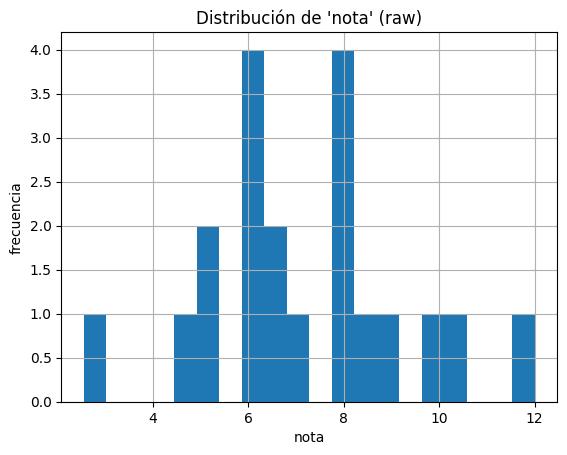

In [12]:

# Histograma de notas (raw)
plt.figure()
df["nota"].hist(bins=20)
plt.title("Distribución de 'nota' (raw)")
plt.xlabel("nota")
plt.ylabel("frecuencia")
plt.show()


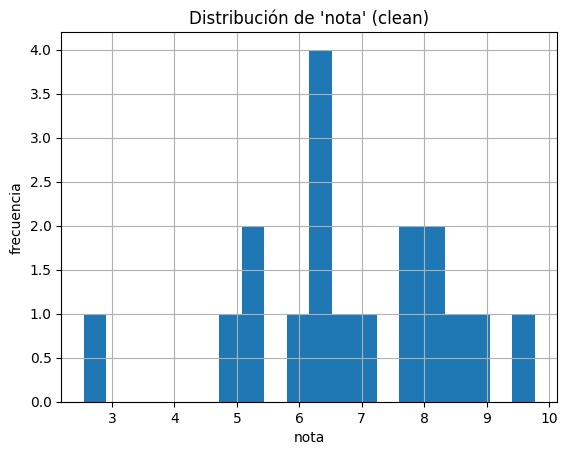

In [13]:

# Histograma de notas (clean)
plt.figure()
df_clean["nota"].hist(bins=20)
plt.title("Distribución de 'nota' (clean)")
plt.xlabel("nota")
plt.ylabel("frecuencia")
plt.show()


<Figure size 640x480 with 0 Axes>

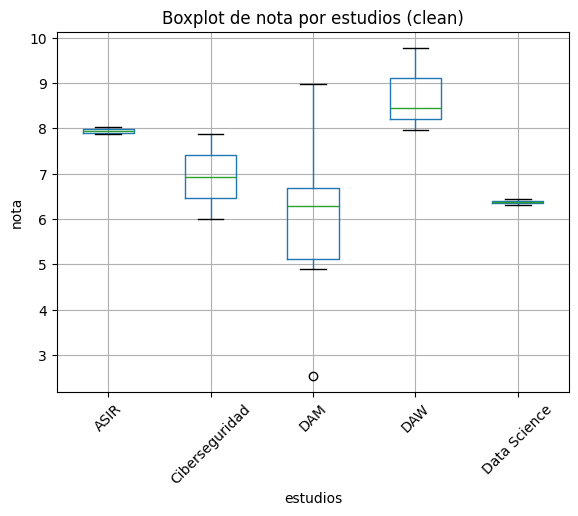

In [14]:

# Boxplot de 'nota' por 'estudios' (clean)
plt.figure()
df_clean.boxplot(column="nota", by="estudios", rot=45)
plt.title("Boxplot de nota por estudios (clean)")
plt.suptitle("")
plt.xlabel("estudios")
plt.ylabel("nota")
plt.show()



## 5. Función de resumen

**Tarea 5.1**: Implementa una función `resumen_medidas(s)` que devuelva un diccionario con:
- media, mediana, moda, rango_medio
- rango, Q1, Q2, Q3, IQR
- varianza_muestral, std_muestral

Pruébala con `nota` y `horas_estudio_semana` en `df_clean`.


In [15]:

# 👉 COMPLETA: función resumen
def resumen_medidas(s):
    s = s.dropna()
    media = s.mean()
    mediana = s.median()
    mode_vals = s.mode()
    moda = mode_vals.min() if not mode_vals.empty else np.nan
    rango_medio = (s.max() + s.min()) / 2
    rango = s.max() - s.min()
    q1, q2, q3 = s.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1
    var_m = s.var(ddof=1)
    std_m = s.std(ddof=1)
    return {
        "media": float(media),
        "mediana": float(mediana),
        "moda": float(moda) if pd.api.types.is_numeric_dtype(s) else moda,
        "rango_medio": float(rango_medio),
        "rango": float(rango),
        "Q1": float(q1), "Q2": float(q2), "Q3": float(q3),
        "IQR": float(iqr),
        "var_muestral": float(var_m),
        "std_muestral": float(std_m),
    }

resumen_medidas(df_clean["nota"]), resumen_medidas(df_clean["horas_estudio_semana"])


({'media': 6.761111111111111,
  'mediana': 6.565,
  'moda': 2.55,
  'rango_medio': 6.16,
  'rango': 7.22,
  'Q1': 6.07,
  'Q2': 6.565,
  'Q3': 7.9475,
  'IQR': 1.8774999999999995,
  'var_muestral': 2.935445751633987,
  'std_muestral': 1.7133142594497914},
 {'media': 12.8,
  'mediana': 12.45,
  'moda': 7.2,
  'rango_medio': 11.65,
  'rango': 20.900000000000002,
  'Q1': 8.4,
  'Q2': 12.45,
  'Q3': 17.925,
  'IQR': 9.525,
  'var_muestral': 38.178947368421056,
  'std_muestral': 6.178911503527224})


## 6. Ejercicio aplicado

Elabora un **miniinforme** (máx. 5 líneas) comparando `nota` entre grupos de `estudios`:
1. Calcula la media y la desviación estándar de `nota` por `estudios` (en `df_clean`).
2. Ordena de mayor a menor media.
3. Interpreta brevemente si hay diferencias relevantes y si la dispersión es similar.



In [16]:

# 👉 COMPLETA: comparativa por estudios
tabla = (df_clean.groupby("estudios")["nota"]
         .agg(media="mean", std="std", n="count")
         .sort_values("media", ascending=False))
tabla


,media,std,n
estudios,,,
DAW,8.733,0.931,3
ASIR,7.950,0.113,2
Ciberseguridad,6.940,1.329,2
Data Science,6.380,0.085,2
DAM,5.884,1.754,9



---

### Notas
- La media es sensible a outliers; la mediana es más robusta.
- El IQR mide la dispersión del 50% central de los datos.
- Varianza muestral usa `ddof=1` (insesgada para muestras).
